# <center>Analise Exploratoria de Dados</center>
https://www.kaggle.com/datasets/programmerrdai/global-land-animal-slaughter-1961-2022

## Importando Bibliotecas e Criando Configuracoes de Estilo

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## Carregando o Dataset

In [29]:

df = pd.read_csv("Data/land-animals-slaughtered-for-meat.csv")
df.head()

,Entity,Code,Year,Number of chickens slaughtered to produce meat,Number of ducks slaughtered to produce meat,Number of pigs slaughtered to produce meat,Number of geese slaughtered to produce meat,Number of sheep slaughtered to produce meat,Number of rabbits slaughtered to produce meat,Number of turkeys slaughtered to produce meat,Number of goats slaughtered to produce meat,Number of cattle slaughtered to produce meat,Number of other animals slaughtered to produce meat
0,Afghanistan,AFG,1961,7000000.0,NaN,NaN,NaN,4336000.0,NaN,NaN,940000.0,360000.0,20000
1,Afghanistan,AFG,1962,7500000.0,NaN,NaN,NaN,4355000.0,NaN,NaN,875000.0,384000.0,22393
2,Afghanistan,AFG,1963,7700000.0,NaN,NaN,NaN,4673000.0,NaN,NaN,810000.0,396000.0,27952
3,Afghanistan,AFG,1964,8000000.0,NaN,NaN,NaN,5010000.0,NaN,NaN,750000.0,402000.0,26000
4,Afghanistan,AFG,1965,8500000.0,NaN,NaN,NaN,5179000.0,NaN,NaN,875000.0,408000.0,24000


## Renomeando Colunas

In [30]:
columns = ['Entity', 'Code', 'Year', 'Chickens', 'Ducks', 'Pigs', 'Geese', 'Sheep', 'Rabbits', 'Turkeys', 'Goats', 'Cattle', 'Other']
df.columns = columns
df.tail()

,Entity,Code,Year,Chickens,Ducks,Pigs,Geese,Sheep,Rabbits,Turkeys,Goats,Cattle,Other
14365,Zimbabwe,ZWE,2018,51133000.0,29000.0,174010.0,NaN,38768.0,NaN,30000.0,2164874.0,2600000.0,0
14366,Zimbabwe,ZWE,2019,71327000.0,27000.0,193820.0,NaN,51842.0,NaN,29000.0,2468732.0,2350000.0,0
14367,Zimbabwe,ZWE,2020,71207000.0,26000.0,183923.0,NaN,52614.0,NaN,30000.0,2077309.0,2300000.0,0
14368,Zimbabwe,ZWE,2021,71611000.0,24000.0,196173.0,NaN,47741.0,NaN,30000.0,2315552.0,2518655.0,0
14369,Zimbabwe,ZWE,2022,71381000.0,22000.0,191305.0,NaN,50732.0,NaN,31000.0,2365640.0,2629904.0,0


## Mudando o formato do Dataset para facilitar a analise

In [31]:
df_long = df.melt(
    id_vars=["Entity", "Code", "Year"],
    value_vars=["Chickens","Ducks","Pigs","Geese","Sheep","Rabbits","Turkeys","Goats","Cattle","Other"],
    var_name="Animal",
    value_name="Value"
)

df = df_long.copy()

del df_long

df

,Entity,Code,Year,Animal,Value
0,Afghanistan,AFG,1961,Chickens,7000000.0
1,Afghanistan,AFG,1962,Chickens,7500000.0
2,Afghanistan,AFG,1963,Chickens,7700000.0
3,Afghanistan,AFG,1964,Chickens,8000000.0
4,Afghanistan,AFG,1965,Chickens,8500000.0
...,...,...,...,...,...
143695,Zimbabwe,ZWE,2018,Other,0.0
143696,Zimbabwe,ZWE,2019,Other,0.0
143697,Zimbabwe,ZWE,2020,Other,0.0
143698,Zimbabwe,ZWE,2021,Other,0.0


## Informacoes Basicas Sobre o Dataset

In [16]:

print("\n--- Info ---")
print(df.info())
print("\n--- Valores nulos ---")
print(df.isna().sum())
print("\n--- Estatísticas descritivas ---")
print(df.describe())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143700 entries, 0 to 143699
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Entity  143700 non-null  object 
 1   Code    117070 non-null  object 
 2   Year    143700 non-null  int64  
 3   Animal  143700 non-null  object 
 4   Value   106276 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.5+ MB
None

--- Valores nulos ---
Entity        0
Code      26630
Year          0
Animal        0
Value     37424
dtype: int64

--- Estatísticas descritivas ---
                Year         Value
count  143700.000000  1.062760e+05
mean     1992.210438  1.479515e+08
std        17.872341  1.422764e+09
min      1961.000000  0.000000e+00
25%      1977.000000  3.220000e+04
50%      1993.000000  6.100055e+05
75%      2008.000000  9.800000e+06
max      2022.000000  7.520867e+10


## Animais Mais Registrados e Paises com maior numero de abates

In [17]:

print("\n--- Animais mais registrados ---")
print(df["Animal"].value_counts().head(5))

# Top 10 países em número total de abates
top_countries = df.groupby("Entity")["Value"].sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 países (abates totais) ---")
print(top_countries)



--- Animais mais registrados ---
Animal
Chickens    14370
Ducks       14370
Pigs        14370
Geese       14370
Sheep       14370
Name: count, dtype: int64

--- Top 10 países (abates totais) ---
Entity
World                            2.387921e+12
Upper-middle-income countries    1.051912e+12
High-income countries            9.504715e+11
Asia (FAO)                       9.122069e+11
Asia                             9.113461e+11
Americas (FAO)                   8.004811e+11
North America                    5.204329e+11
Europe (FAO)                     4.922763e+11
Europe                           4.872210e+11
Eastern Asia (FAO)               4.642276e+11
Name: Value, dtype: float64


## Evolucao Temporal

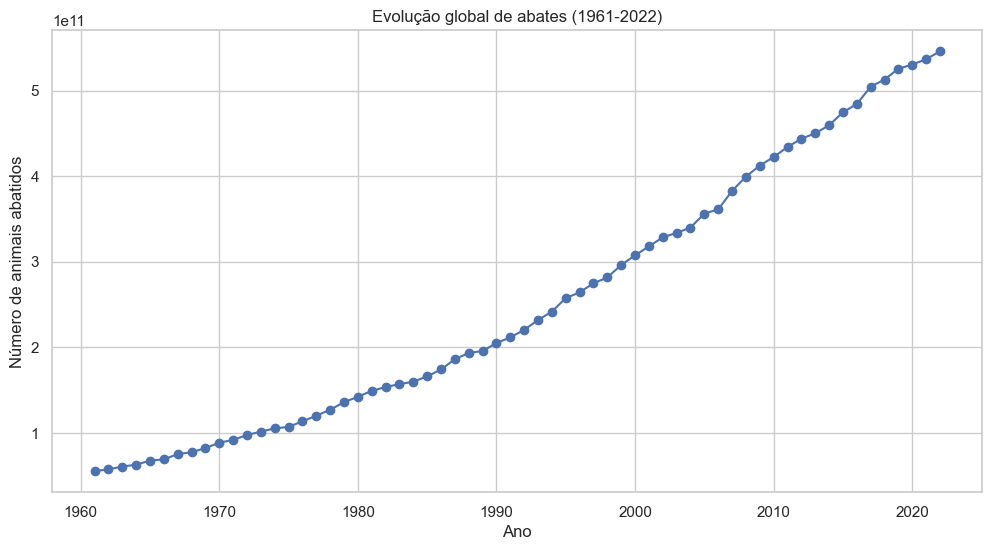

In [18]:

df_global = df.groupby("Year")["Value"].sum()
plt.figure()
df_global.plot(kind="line", marker="o")
plt.title("Evolução global de abates (1961-2022)")
plt.ylabel("Número de animais abatidos")
plt.xlabel("Ano")
plt.show()


## Evolucao por Animal

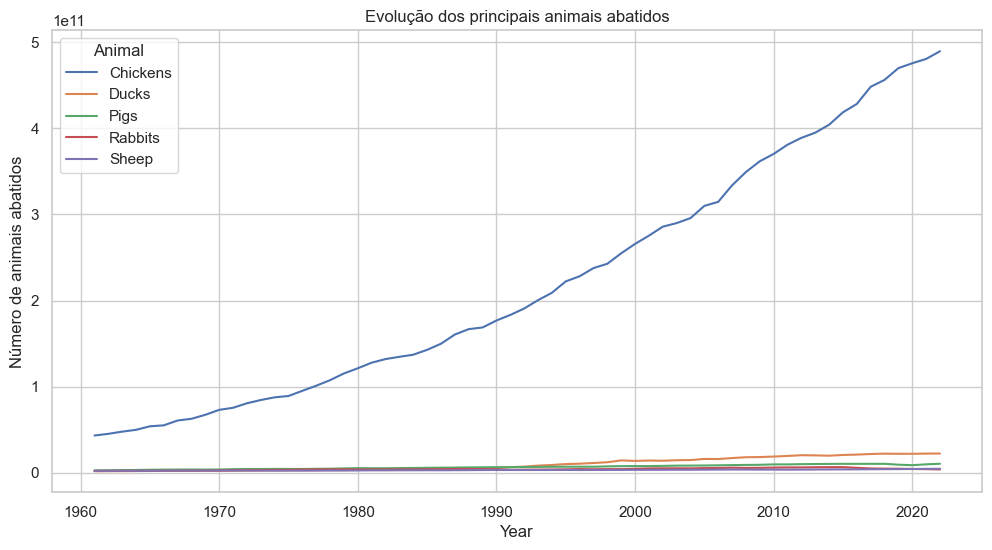

In [ ]:

top_animals = df.groupby("Animal")["Value"].sum().sort_values(ascending=False).head(5).index
df_animals = df[df["Animal"].isin(top_animals)]

df_animals_grouped = df_animals.groupby(["Year","Animal"])["Value"].sum().reset_index()
plt.figure()
sns.lineplot(data=df_animals_grouped, x="Year", y="Value", hue="Animal")
plt.title("Evolução dos principais animais abatidos")
plt.ylabel("Número de animais abatidos")
plt.show()


## Comparacao entre paises

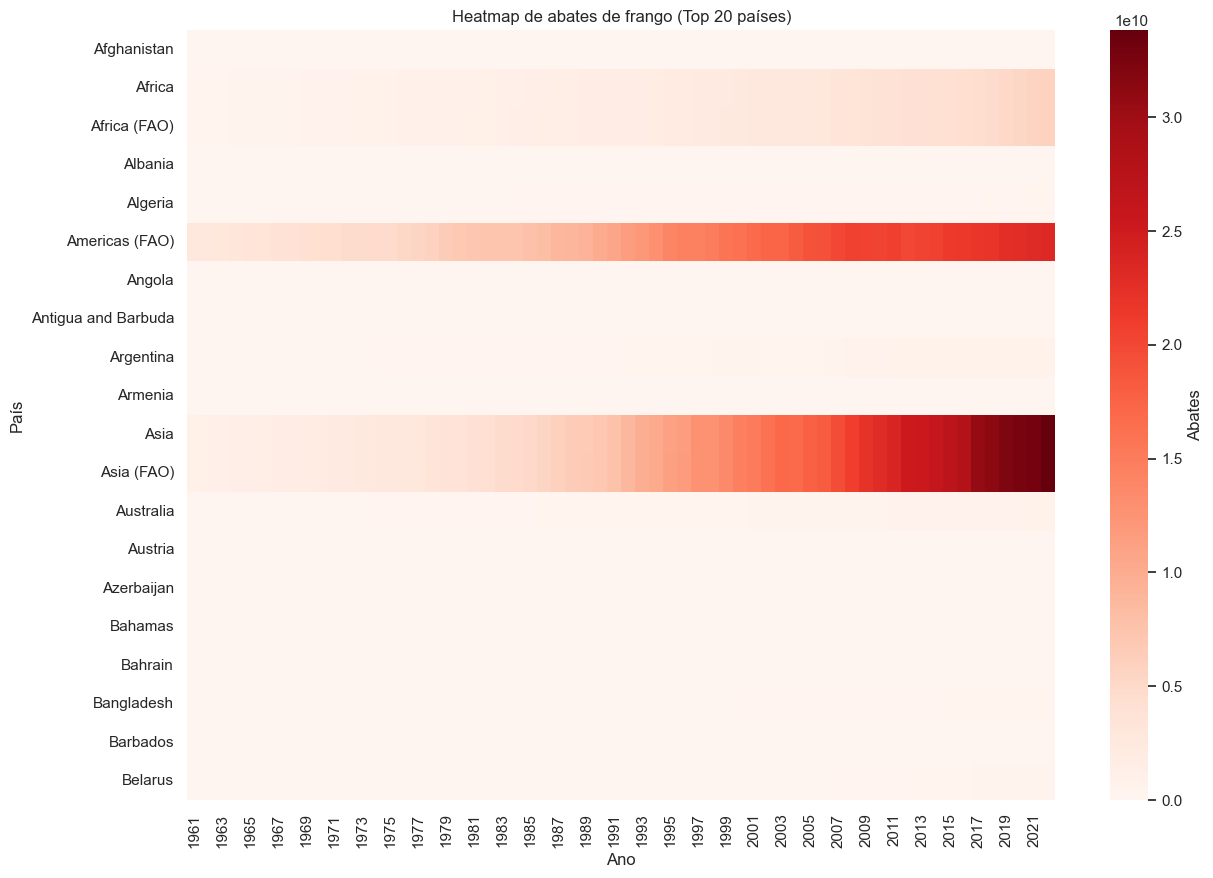

In [22]:

df_chicken = df[df["Animal"]=="Chickens"]
df_pivot = df_chicken.pivot_table(index="Entity", columns="Year", values="Value", aggfunc="sum")

plt.figure(figsize=(14,10))
sns.heatmap(df_pivot.fillna(0).iloc[:20, :], cmap="Reds", cbar_kws={'label': 'Abates'})
plt.title("Heatmap de abates de frango (Top 20 países)")
plt.xlabel("Ano")
plt.ylabel("País")
plt.show()


## Comparacao entre animais

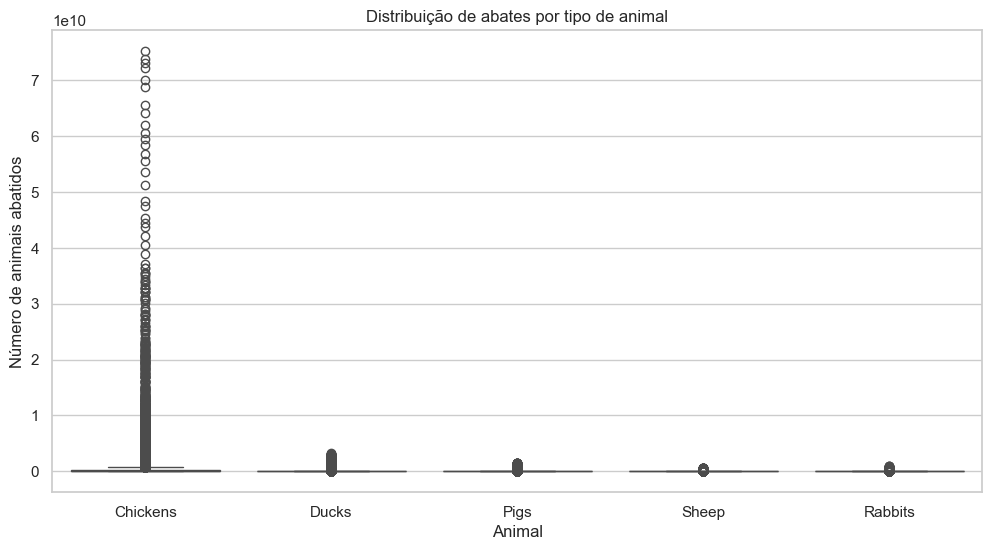

In [23]:

plt.figure()
sns.boxplot(data=df[df["Animal"].isin(top_animals)], x="Animal", y="Value")
plt.title("Distribuição de abates por tipo de animal")
plt.ylabel("Número de animais abatidos")
plt.show()
